# PEC-03-2021
In this notebook I will retrieve data from an API for a given matter voted by the brazilian congressman.
It will start the search using the string `PEC 03/2021`

In [1]:
import requests
import json

First we will call the API to find the proposition code of the matter based on the codename

In [2]:

matter_type = 'pec'
matter_number = '03'
matter_year = '2021'
url = f'https://dadosabertos.camara.leg.br/api/v2/proposicoes?siglaTipo={matter_type}&numero={matter_number}&ano={matter_year}&ordem=ASC&ordenarPor=id'

response = requests.get(url)
data = response.content.decode('utf-8')
data = json.loads(data)
print(json.dumps(data, indent=4, ensure_ascii=False))

{
    "dados": [
        {
            "id": 2270800,
            "uri": "https://dadosabertos.camara.leg.br/api/v2/proposicoes/2270800",
            "siglaTipo": "PEC",
            "codTipo": 136,
            "numero": 3,
            "ano": 2021,
            "ementa": "Altera os arts. 14, 27, 53, 102 e 105 da Constituição Federal, para dispor sobre as prerrogativas parlamentares e dá outras providências."
        }
    ],
    "links": [
        {
            "rel": "self",
            "href": "https://dadosabertos.camara.leg.br/api/v2/proposicoes?siglaTipo=pec&numero=03&ano=2021&ordem=ASC&ordenarPor=id"
        },
        {
            "rel": "first",
            "href": "https://dadosabertos.camara.leg.br/api/v2/proposicoes?siglaTipo=pec&numero=03&ano=2021&ordem=ASC&ordenarPor=id&pagina=1&itens=15"
        },
        {
            "rel": "last",
            "href": "https://dadosabertos.camara.leg.br/api/v2/proposicoes?siglaTipo=pec&numero=03&ano=2021&ordem=ASC&ordenarPor=id&pagina=1

Now with the proposition code we will get more details on the history of the proposition, from idea to the final voting

In [3]:
proposition_code = data['dados'][0]['id']  # This is the proposition code we will use to get more details
print(f'Proposition code: {proposition_code}')
url = f'https://dadosabertos.camara.leg.br/api/v2/proposicoes/{proposition_code}/votacoes'
response2 = requests.get(url)
data2 = response2.content.decode('utf-8')
data2 = json.loads(data2)
print(json.dumps(data2, indent=4, ensure_ascii=False))

Proposition code: 2270800


{
    "dados": [
        {
            "id": "2270800-177",
            "uri": "https://dadosabertos.camara.leg.br/api/v2/votacoes/2270800-177",
            "data": "2025-09-17",
            "dataHoraRegistro": "2025-09-17T14:12:20",
            "siglaOrgao": "PLEN",
            "uriOrgao": "https://dadosabertos.camara.leg.br/api/v2/orgaos/180",
            "uriEvento": "https://dadosabertos.camara.leg.br/api/v2/eventos/79266",
            "proposicaoObjeto": null,
            "uriProposicaoObjeto": null,
            "descricao": "Aprovada a Redação Final assinada pelo Relator, Dep. Claudio Cajado (PP/BA).",
            "aprovacao": 1
        },
        {
            "id": "2270800-175",
            "uri": "https://dadosabertos.camara.leg.br/api/v2/votacoes/2270800-175",
            "data": "2025-09-17",
            "dataHoraRegistro": "2025-09-17T14:11:37",
            "siglaOrgao": "PLEN",
            "uriOrgao": "https://dadosabertos.camara.leg.br/api/v2/orgaos/180",
            "ur

We will take only the last voting, that corresponds to the final text sent from congress to the senate

In [4]:
voting_code = data2['dados'][0]['id']  # Taking the last voting, that corresponds to the final text sent from congress to the senate
print(f'Voting code: {voting_code}')
url = f'https://dadosabertos.camara.leg.br/api/v2/votacoes/{voting_code}/votos'
response3 = requests.get(url)
data3 = response3.content.decode('utf-8')
data3 = json.loads(data3)
print(json.dumps(data3, indent=4, ensure_ascii=False))

Voting code: 2270800-177
{
    "dados": [],
    "links": [
        {
            "rel": "self",
            "href": "https://dadosabertos.camara.leg.br/api/v2/votacoes/2270800-177/votos"
        }
    ]
}


We got an empty list of votes, so that voting session was a symbolic session when the votes are not counted. Lets see what happened in the previous voting session

In [5]:
voting_code = data2['dados'][1]['id']  # Taking the last voting, that corresponds to the final text sent from congress to the senate
print(f'Voting code: {voting_code}')
url = f'https://dadosabertos.camara.leg.br/api/v2/votacoes/{voting_code}/votos'
response3 = requests.get(url)
data3 = response3.content.decode('utf-8')
data3 = json.loads(data3)
print(json.dumps(data3, indent=4, ensure_ascii=False))

Voting code: 2270800-175
{
    "dados": [
        {
            "tipoVoto": "Não",
            "dataRegistroVoto": "2025-09-17T14:09:50",
            "deputado_": {
                "id": 220615,
                "uri": "https://dadosabertos.camara.leg.br/api/v2/deputados/220615",
                "nome": "Pastor Henrique Vieira",
                "siglaPartido": "PSOL",
                "uriPartido": "https://dadosabertos.camara.leg.br/api/v2/partidos/36839",
                "siglaUf": "RJ",
                "idLegislatura": 57,
                "urlFoto": "https://www.camara.leg.br/internet/deputado/bandep/220615.jpg",
                "email": "dep.pastorhenriquevieira@camara.leg.br"
            }
        },
        {
            "tipoVoto": "Não",
            "dataRegistroVoto": "2025-09-17T14:09:34",
            "deputado_": {
                "id": 74171,
                "uri": "https://dadosabertos.camara.leg.br/api/v2/deputados/74171",
                "nome": "Chico Alencar",
          

Ok, we have the votes here ordered in a json schema. First lets clean this data and see what it tells us

In [6]:
import pandas as pd

df = pd.json_normalize(data3['dados'])
df = df[['deputado_.nome', 'deputado_.siglaPartido', 'deputado_.siglaUf', 'tipoVoto']]
df.columns = ['Nome', 'Partido', 'Estado', 'Voto']
df.head()

,Nome,Partido,Estado,Voto
0,Pastor Henrique Vieira,PSOL,RJ,Não
1,Chico Alencar,PSOL,RJ,Não
2,Fernanda Melchionna,PSOL,RS,Não
3,Felipe Carreras,PSB,PE,Sim
4,Reginaldo Lopes,PT,MG,Não


Text(0.5, 1.0, 'Distribuição dos Votos na PEC 03/2021')

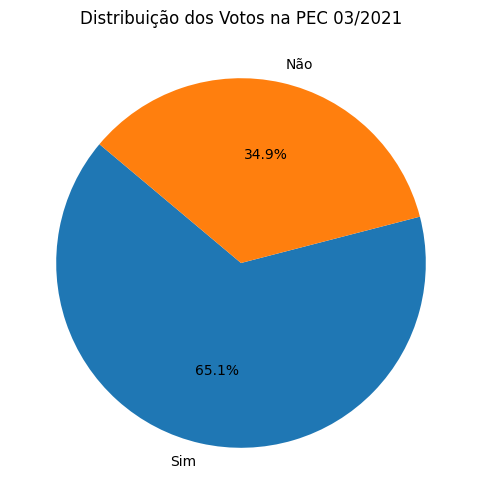

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.pie(df['Voto'].value_counts(), labels=df['Voto'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Votos na PEC 03/2021')

Now let's see how each party voted

Voto            Não   Sim
Partido                  
AVANTE          1.0   6.0
CIDADANIA       2.0   2.0
MDB             7.0  27.0
NOVO            4.0   0.0
PCdoB           9.0   0.0
PDT            11.0   4.0
PL              0.0  85.0
PODE            3.0  14.0
PP              2.0  46.0
PRD             1.0   4.0
PSB            13.0   3.0
PSD            21.0  18.0
PSDB            6.0   7.0
PSOL           14.0   0.0
PT             57.0   8.0
PV              4.0   0.0
REDE            1.0   0.0
REPUBLICANOS    1.0  43.0
SOLIDARIEDADE   1.0   4.0
UNIÃO          10.0  43.0


<Axes: title={'center': 'Votos por Partido'}, xlabel='Partido'>

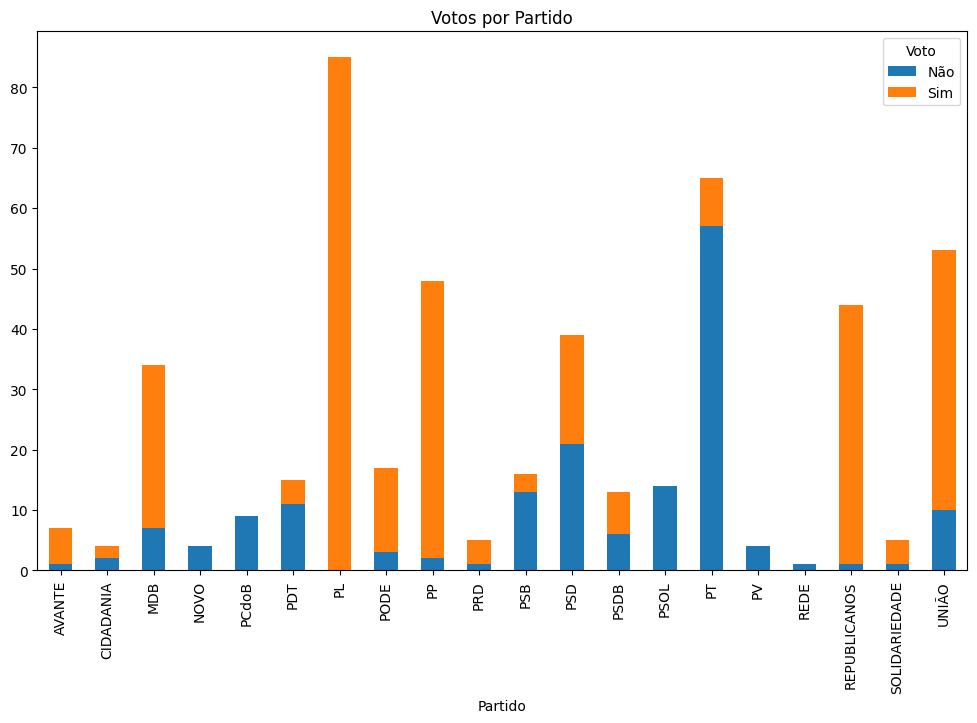

In [8]:
party_votes = df.groupby('Partido')['Voto'].value_counts().unstack().fillna(0)
print(party_votes)
party_votes.plot(kind='bar', stacked=True, figsize=(12, 7), title='Votos por Partido') 

Lets see how the congressman from each state voted

Voto     Não   Sim      Nao %       Sim %
Estado                                   
AC       2.0   5.0  28.571429   71.428571
AL       1.0   5.0  16.666667   83.333333
AM       2.0   4.0  33.333333   66.666667
AP       4.0   4.0  50.000000   50.000000
BA      12.0  23.0  34.285714   65.714286
CE       9.0  11.0  45.000000   55.000000
DF       3.0   4.0  42.857143   57.142857
ES       3.0   7.0  30.000000   70.000000
GO       2.0  14.0  12.500000   87.500000
MA       4.0  14.0  22.222222   77.777778
MG      13.0  38.0  25.490196   74.509804
MS       3.0   5.0  37.500000   62.500000
MT       0.0   5.0   0.000000  100.000000
PA       4.0  11.0  26.666667   73.333333
PB       3.0   9.0  25.000000   75.000000
PE       9.0  14.0  39.130435   60.869565
PI       5.0   4.0  55.555556   44.444444
PR      11.0  18.0  37.931034   62.068966
RJ      19.0  27.0  41.304348   58.695652
RN       2.0   6.0  25.000000   75.000000
RO       3.0   5.0  37.500000   62.500000
RR       1.0   6.0  14.285714   85

<Axes: title={'center': 'Votos por Estado'}, xlabel='Estado'>

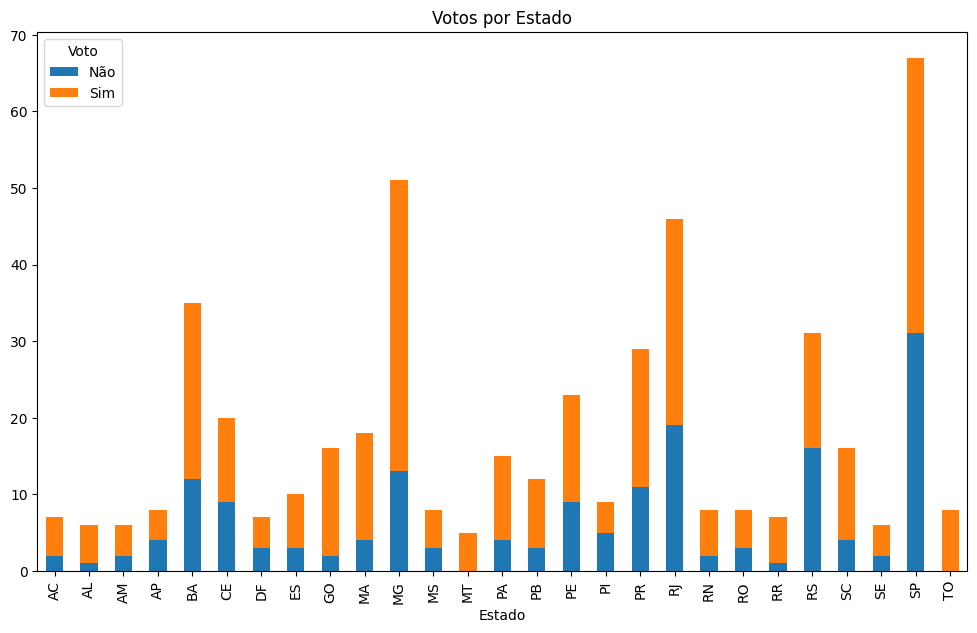

In [9]:
state_votes = df.groupby('Estado')['Voto'].value_counts().unstack().fillna(0)
state_votes['Nao %'] = state_votes.iloc[:,0] / (state_votes.iloc[:,0] + state_votes.iloc[:,1]) * 100
state_votes['Sim %'] = state_votes.iloc[:,1] / (state_votes.iloc[:,0] + state_votes.iloc[:,1]) * 100

print(state_votes)
state_votes.plot(y=[0,1], kind='bar', stacked=True, figsize=(12, 7), title='Votos por Estado')

In [12]:
import folium
# Create a map centered around Brazil
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

url_geojson = 'https://raw.githubusercontent.com/giuliano-macedo/geodata-br-states/refs/heads/main/geojson/br_states.json'
states_data = requests.get(url_geojson).json()

In [ ]:
#state_votes = state_votes.reset_index()
from numpy import linspace
print(state_votes)


folium.Choropleth(
    geo_data=states_data,
    name='choropleth',
    data=state_votes.iloc[:, [2, 3]],
    columns=[state_votes.index, 'Sim %'],
    key_on='feature.id',
    bins=linspace(0, 100, 11),
    fill_color='YlGn',
).add_to(m)

m

Voto     Não   Sim      Nao %       Sim %
Estado                                   
AC       2.0   5.0  28.571429   71.428571
AL       1.0   5.0  16.666667   83.333333
AM       2.0   4.0  33.333333   66.666667
AP       4.0   4.0  50.000000   50.000000
BA      12.0  23.0  34.285714   65.714286
CE       9.0  11.0  45.000000   55.000000
DF       3.0   4.0  42.857143   57.142857
ES       3.0   7.0  30.000000   70.000000
GO       2.0  14.0  12.500000   87.500000
MA       4.0  14.0  22.222222   77.777778
MG      13.0  38.0  25.490196   74.509804
MS       3.0   5.0  37.500000   62.500000
MT       0.0   5.0   0.000000  100.000000
PA       4.0  11.0  26.666667   73.333333
PB       3.0   9.0  25.000000   75.000000
PE       9.0  14.0  39.130435   60.869565
PI       5.0   4.0  55.555556   44.444444
PR      11.0  18.0  37.931034   62.068966
RJ      19.0  27.0  41.304348   58.695652
RN       2.0   6.0  25.000000   75.000000
RO       3.0   5.0  37.500000   62.500000
RR       1.0   6.0  14.285714   85

ValueError: YlRdGn is not a valid ColorBrewer code